## Observations and Insights 

3 Observations
    * Sex of the mouse was in general close proximity for most drug regimens with Cectamin having far fewer females, while the others had only slightly more females.  Since all were in the top 4, I don't think sex had an impact on the outcome.  It may be nice to know the end percentage of sex for the trials.  Did a higher percentage of either sex have a greater chance of survival.
    * The line scatter plot of timepoint and tumor size showed what seems to me quite a some mice initially having their tumor size grow until timepoint 10 and then have a few drop.  This continued to occur through timepoint 20 with a few having continual growth and then a somewhat significant drop where they fall in line with the rest of the pack.  Does this raises a concern that there is a delay before the desired effect to occur for a certain percentage of the population? 
    * There does seem to be a correlation between increased weight and tumor size.  This is show in both the scatter plot and the positive correlation value.

In [182]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Added this to remove warnings generated during one of the merges that I don't believe is causing any issues
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action='ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# The mouse_metadata seems to be the DF that best defines a mouse.  The merge will create multiple
# entries based on a timepount, but the results cannot exist without a mouse, and the mouse 
# exising without results may make no sense, but lets determine that later.  Do a left merge
# keeping mouse meta data
mouse_study_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

In [28]:
# the number of unique records in mouse_metadata to compare below
print(mouse_metadata.nunique())

Mouse ID        249
Drug Regimen     10
Sex               2
Age_months       24
Weight (g)       16
dtype: int64


In [29]:
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Checking the number of mice in the DataFrame.
# Does the need to be the number of unique Mouse ID records.  I am assuming so as the question would be poised differently
print(mouse_study_df['Mouse ID'].nunique())
# another option is showing counts
mouse_study_df['Mouse ID'].count()

249


1893

In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# This seems to be a group by having count() > 1
mouse_data_groups = mouse_study_df.groupby(['Mouse ID', 'Timepoint'])
# size is the function that provides the size of the group by.
size = mouse_data_groups.size().reset_index()
duplicate_data = size[size[0] > 1]['Mouse ID'].unique()
duplicate_mouse_id =  duplicate_data[0]
duplicate_mouse_id

'g989'

In [32]:
# Optional: Get all the data for the duplicate mouse ID. 
# Set the index so that loc can be used to find it
mouse_study_df.set_index('Mouse ID', inplace=True)

# Copy the data so as not to corrupt the dataframe that will be used going forward
mouse_data_copy_df = mouse_study_df.copy()

duplicate_mouse_data = mouse_data_copy_df.loc[[duplicate_mouse_id]]
duplicate_mouse_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df[mouse_study_df.index != duplicate_mouse_id]
clean_mouse_study_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [34]:
# Checking the number of mice in the clean DataFrame.
# Note: There is one less unique Mouse ID and 13 reduced record count which matches what is expected
print(clean_mouse_study_df.index.nunique())
# another option is showing counts
clean_mouse_study_df.count()

248


Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby_regimen = clean_mouse_study_df.groupby('Drug Regimen')
group_data = pd.DataFrame() 

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#gropuby_regimen.value_counts()
group_data['Mean'] = groupby_regimen['Tumor Volume (mm3)'].mean()
group_data['Median'] = groupby_regimen['Tumor Volume (mm3)'].median()
group_data['Variance'] = groupby_regimen['Tumor Volume (mm3)'].var()
group_data['Standard Deviation'] = groupby_regimen['Tumor Volume (mm3)'].std()
group_data['SEM'] = groupby_regimen['Tumor Volume (mm3)'].sem()

group_data

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# create empty lists to add the data to
summary_regimen = []
summary_mean = []
summary_median = []
summary_variance = []
summary_stddev = []
summary_SEM = []

specific_regimen_data_df = []

# Get the unique regimen
regimens = np.sort(clean_mouse_study_df['Drug Regimen'].unique())
print(type(regimens))
tumor_data_df = clean_mouse_study_df[['Drug Regimen', 'Tumor Volume (mm3)']]

# Iterate through each regimen
for regimen in regimens:
    # Capture the current regimen
    summary_regimen.append(regimen)
    
    # Capture the data associated with that regimen
    specific_regimen = tumor_data_df.loc[(clean_mouse_study_df['Drug Regimen'] == regimen)]
    
    # Add the required statistic values to their respective lists
    summary_mean.append(specific_regimen.mean())
    summary_median.append(specific_regimen.median())    
    summary_variance.append(specific_regimen.var())
    summary_stddev.append(specific_regimen.std())
    summary_SEM.append(specific_regimen.sem())
    #print(f"{regimen} :=> mean: {regimen_mean}, median: {regimen_median}")

# concatenate all of the series together
summary_data_df = pd.concat([pd.DataFrame(summary_regimen)
                             , pd.DataFrame(summary_mean)
                             , pd.DataFrame(summary_median)
                             , pd.DataFrame(summary_variance)
                             , pd.DataFrame(summary_stddev)
                             , pd.DataFrame(summary_SEM)]
                            , axis=1)


#rename columns as they are all 0
summary_data_df.columns = ["Drug Regimen", "Mean", "Median", "Variance", "Standard Deviation", "SEM"]

# sort the data and set index to Regimen
summary_data_df.sort_values("Drug Regimen", inplace=True)
summary_data_df.set_index('Drug Regimen', inplace=True)

summary_data_df

<class 'numpy.ndarray'>


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

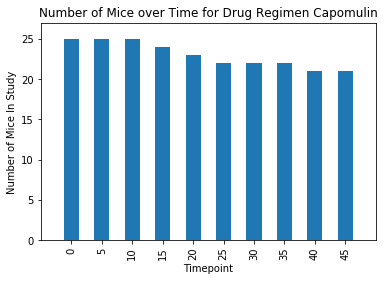

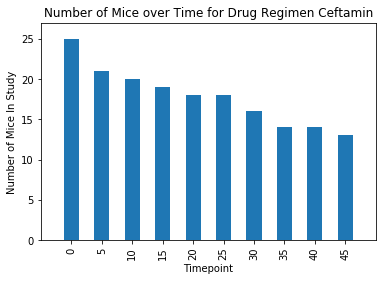

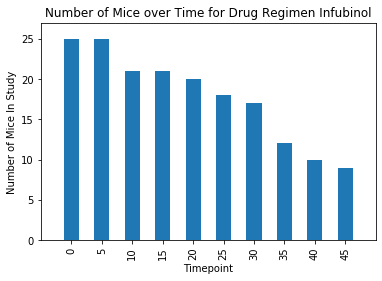

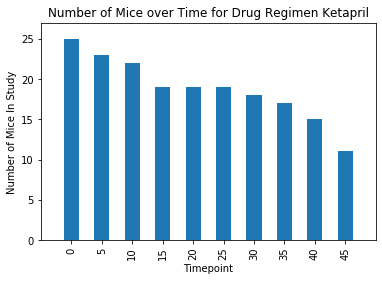

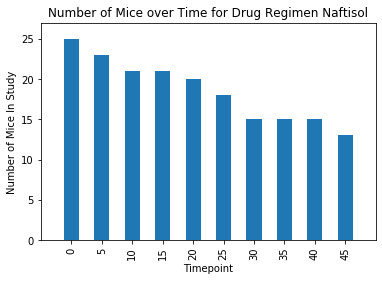

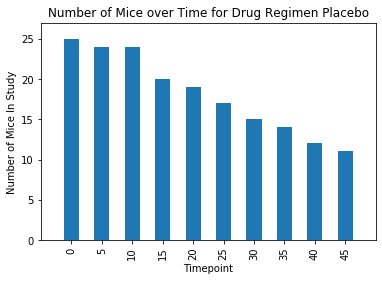

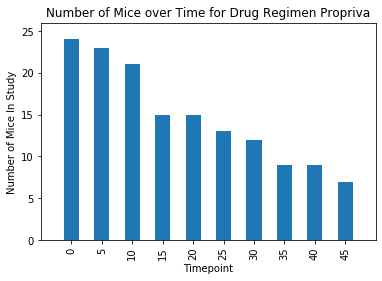

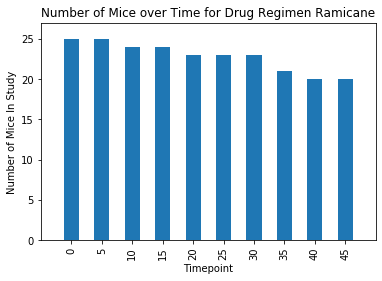

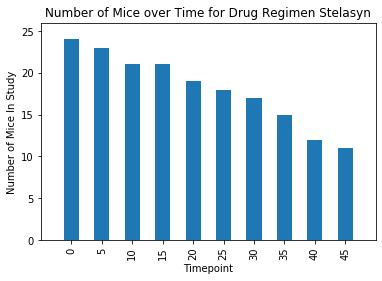

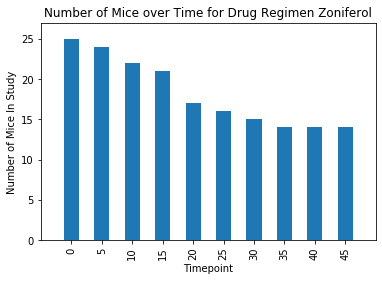

In [37]:
# using pandas -------
# Generate a bar plot showing the number of mice per time point 
#for each treatment throughout the course of the study. 

timepoints = clean_mouse_study_df["Timepoint"].unique()

# Generate the data frames to be used by both methods
group_data = pd.DataFrame() 

for regimen in regimens:
    specific_regimen = clean_mouse_study_df.loc[(clean_mouse_study_df['Drug Regimen'] == regimen)]
    groupby_regimen = specific_regimen.groupby('Timepoint')

    # Still save off data for groupby bar chart....extra credit???
    group_data[regimen] = groupby_regimen.count()['Sex']

    # Get the maximum value in the first row....assuming that there will not be mice added after beginnging
    max_number_of_mice =  group_data[regimen].iloc[0:1][0]

    # Plot the Drug Regimen
    ax = group_data[regimen].plot(kind='bar', title=f"Number of Mice over Time for Drug Regimen {regimen}")
    ax.set_ylabel("Number of Mice In Study")
    ax.set_ylim(0, max_number_of_mice + 2)
    ax.set_xlim(-1, len(timepoints))
    plt.show()
    
mice_by_timepoint = group_data


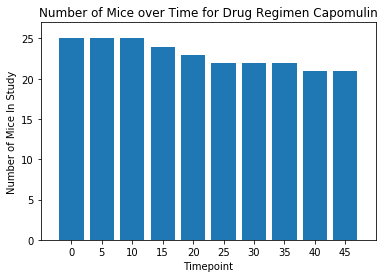

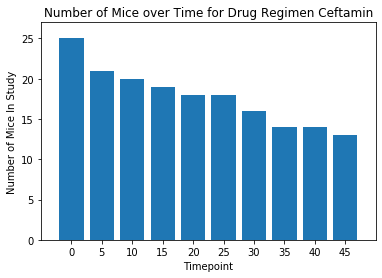

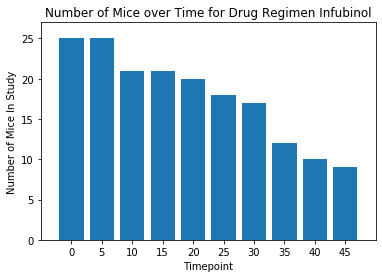

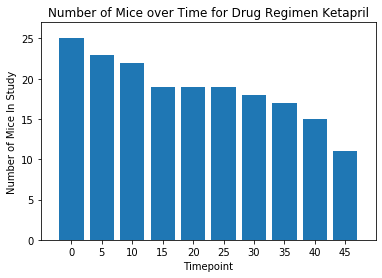

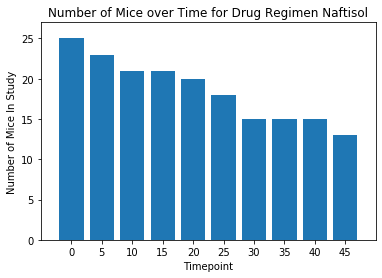

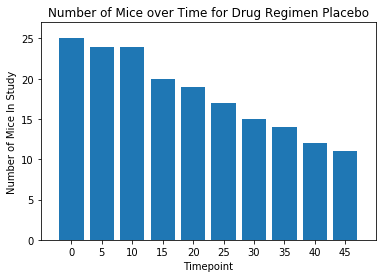

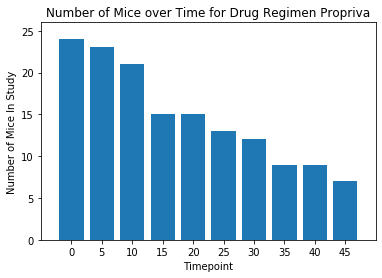

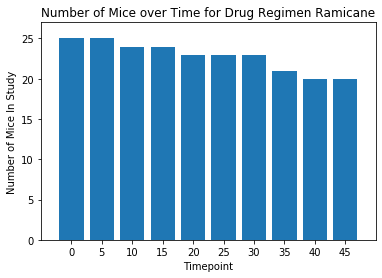

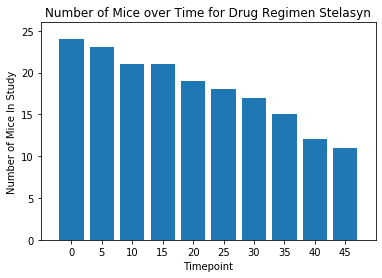

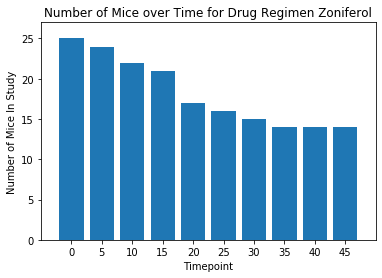

In [38]:
# using pyplt -------
# Generate a bar plot showing the number of mice per time point 
#for each treatment throughout the course of the study. 
x_axis = np.arange(len(timepoints))

for regimen in regimens:
    plt.bar(x_axis
            , group_data[regimen]
            )

    # Get the maximum value in the first row....assuming that there will not be mice added after beginnging
    max_number_of_mice =  group_data[regimen].iloc[0:1][0]
   
    # Set the ticks based on timepoints
    plt.xticks(np.arange(len(timepoints)), timepoints)

    plt.title(f"Number of Mice over Time for Drug Regimen {regimen}")
    # Set the x and y labels to same as before
    #TODO: convert to variable to allow for standardization
    plt.xlabel('Timepoint')
    plt.ylabel('Number of Mice In Study')

    # Set the x and y limits to the same as other bar graph
    plt.ylim(0,max_number_of_mice + 2)
    plt.xlim(-1, len(timepoints))
    plt.show()


['Capomulin' 'Ceftamin' 'Infubinol' 'Ketapril' 'Naftisol' 'Placebo'
 'Propriva' 'Ramicane' 'Stelasyn' 'Zoniferol']


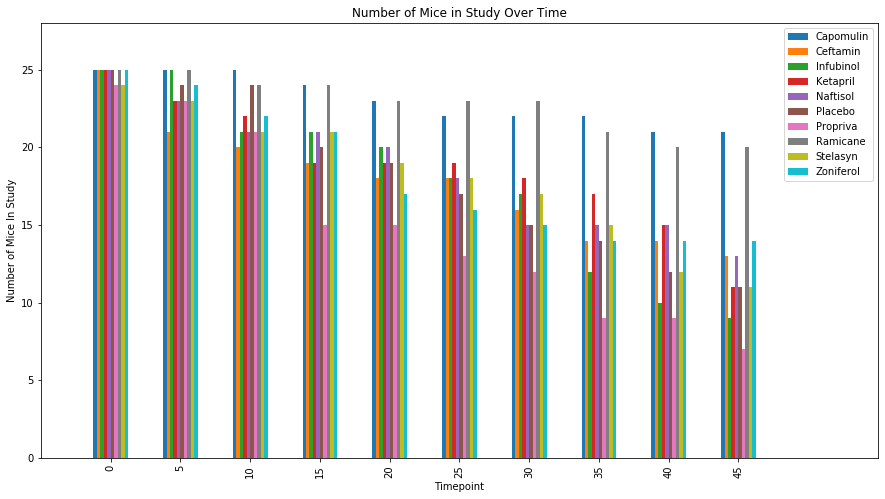

In [39]:
# This is extra credit????
######################################
# This is the panda dataframe way
# The x-axis is made up of the time points....get a numpy array of time points
print(regimens)
ax = mice_by_timepoint.plot(kind='bar', figsize=(15,8), title='Number of Mice in Study Over Time', legend=True)
ax.set_ylabel("Number of Mice In Study")
ax.set_ylim(0, max_number_of_mice + 3)
ax.set_xlim(-1, len(timepoints) + 1)

# Had to google to determine how to set loc 'Best' for dataframe plots
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

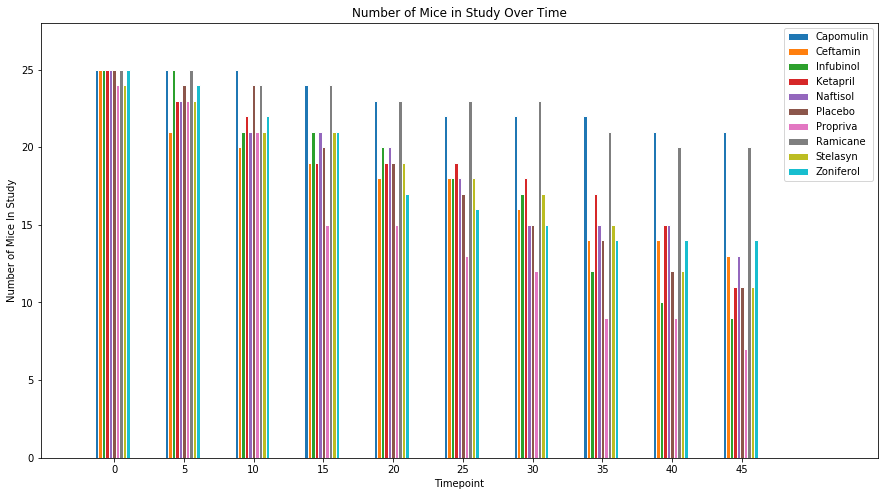

In [40]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# set width of bar
barWidth = 0.05

# Create subplots, the size should be the same as with the other bar graph
fig, ax = plt.subplots(figsize=(15,8))

# Create a list of barchart data.  There will be an entry for each regimen
barchart_data_list = []

# value for previous barchart to indicate first one
previous_barchart = ''

#regimens = ['Capomulin', 'Ceftamin']
for regimen in regimens:
    x = ''
    # The first entry will be based on simple range of time points
    if previous_barchart == '':
        # The .2 is an offset so that the tick will be more central
        x = [val - .2 for val in np.arange(len(timepoints))]
    else:
        x = [val + barWidth for val in previous_barchart]

    # set previous_barchart to correctly set x range based on previous
    previous_barchart = x
    
    # append the data as a dictionary to the list
    barchart_data_list.append({'name': regimen
                               , 'data' : group_data[regimen]
                               , 'x_axis' : x})

# Iterate through each regimen that is now represented in barchart data list
for barchart_data in barchart_data_list:
    # pull the information out of the dictionary items to plot the bar graph
    plt.bar(barchart_data['x_axis']
            , barchart_data['data']
            , width=barWidth
            , edgecolor='white'
            , label=barchart_data['name'])

# Set the xticks based on the specified barwidth
plt.xticks([r + barWidth for r in range(len(timepoints))], timepoints)

# set the legend to the best location 
plt.legend(loc='best')

# Set the x and y labels to same as before
#TODO: convert to variable to allow for standardization
plt.xlabel('Timepoint')
plt.ylabel('Number of Mice In Study')

# Set the x and y limits to the same as other bar graph
plt.ylim(0,max_number_of_mice + 3)
plt.xlim(-1, len(timepoints) + 1)

# Set the title to the same as other bar graph
#TODO: convert to variable to allow for standardization
plt.title("Number of Mice in Study Over Time")

plt.show()

## Pie Plots

In [41]:
# Generate the data frames to be used by both methods
mice_sextype_data = clean_mouse_study_df.groupby("Sex")


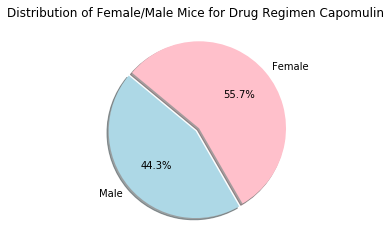

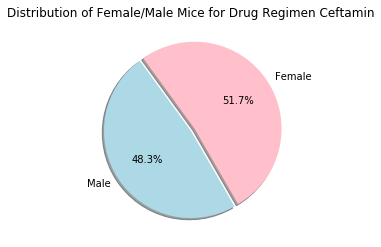

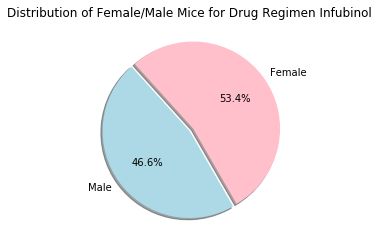

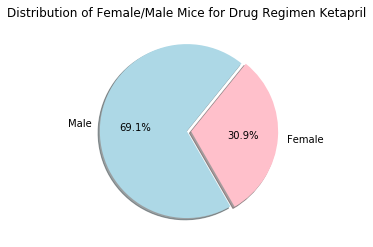

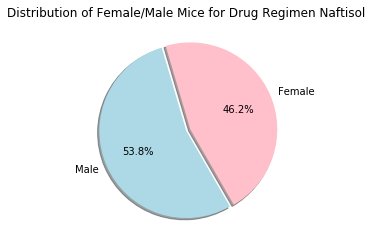

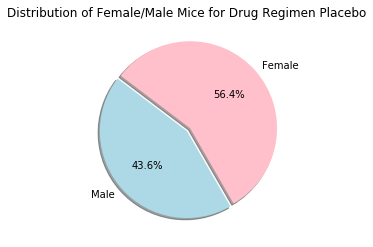

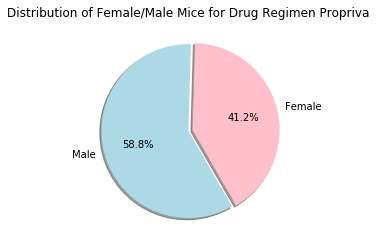

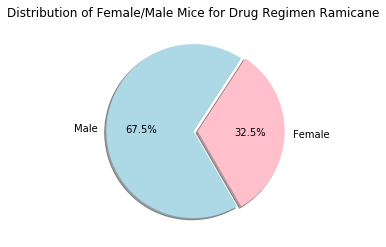

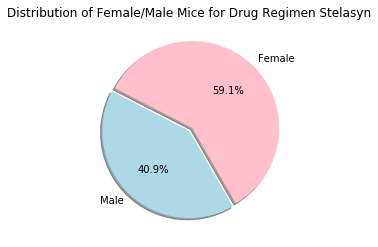

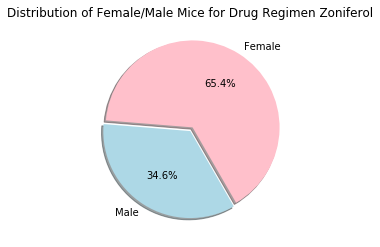

In [42]:
# DataFrame method for generating Pie chart

# define some styles
explode = (0.05, 0)
colors = ["pink","lightblue"]

for regimen in regimens:
    mice_regimen_data = clean_mouse_study_df.loc[(clean_mouse_study_df["Drug Regimen"] == regimen)]
    mice_sextype_groupby = mice_regimen_data.groupby("Sex").count()["Drug Regimen"]
    #print(mice_sextype_groupby.head())
    
    ax=mice_sextype_groupby.plot(kind="pie"
                    , title=f"Distribution of Female/Male Mice for Drug Regimen {regimen}"
                    , autopct='%1.1f%%', shadow=True, startangle=300
                    , explode=explode, colors=colors)
    
    # don't really want a y axis label, so turning it off
    plt.axis('off')
    
    # option to offset it to prevent collision with value label
    #ax.set_ylabel("Mouse Sex")
    #ax.yaxis.set_label_coords(-0.1,0.5)
    plt.show() 

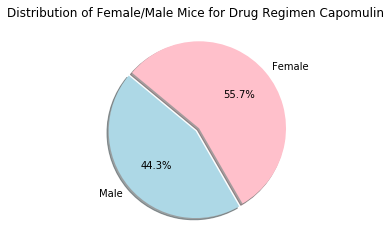

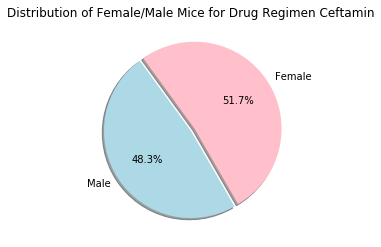

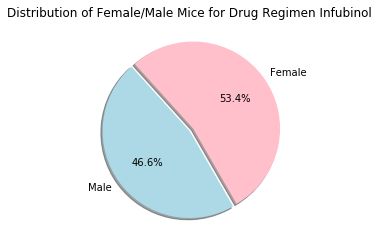

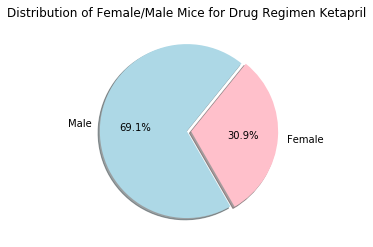

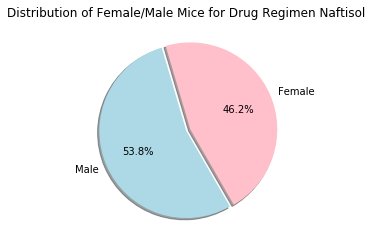

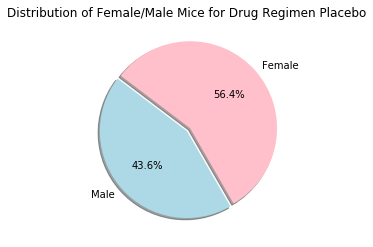

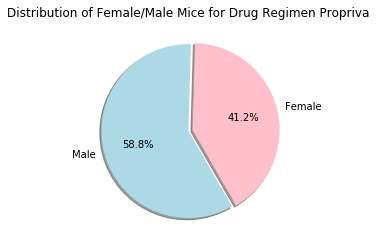

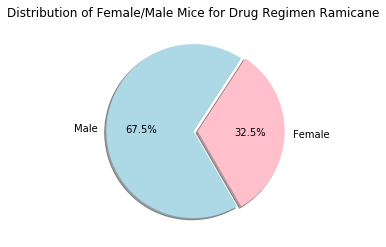

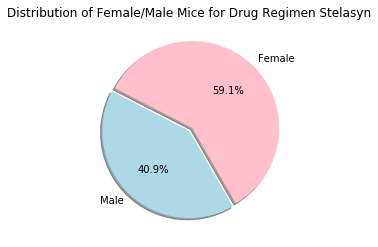

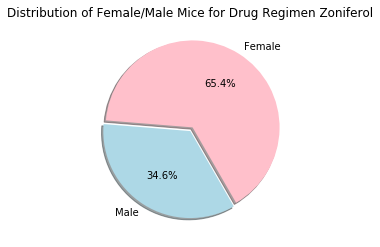

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Iterate through all drug regimens to generate a pie plot
for regimen in regimens:
    mice_regimen_data = clean_mouse_study_df.loc[(clean_mouse_study_df["Drug Regimen"] == regimen)]
    mice_sextype_groupby = mice_regimen_data.groupby("Sex").count()["Drug Regimen"]
    #print(mice_sextype_groupby.head())
    
    # Female and Male and in the index, use them as the labels
    labels = mice_sextype_groupby.index 
    
    # Generate the pie plot using the same values as above
    ax = plt.pie(mice_sextype_groupby, labels=labels
                 ,colors=colors, autopct='%1.1f%%'
                 , shadow=True, startangle=300
                 , explode=explode)
    plt.title(f"Distribution of Female/Male Mice for Drug Regimen {regimen}")
    
    plt.show() 

In [44]:
# This is Extra Credit ???????
# Generate a pie plot showing the distribution of female versus male mice using pandas

#male_mice = clean_mouse_study_df.loc[(clean_mouse_study_df["Sex"] == "Male")]
#female_mice = clean_mouse_study_df.loc[(clean_mouse_study_df["Sex"] == "Female")]

group_sexdistribution_data = pd.DataFrame() 
sexes = clean_mouse_study_df["Sex"].unique()

#print(sexes)
for regimen in regimens:
    for sex in sexes:
        subgroup = clean_mouse_study_df.loc[ (clean_mouse_study_df['Drug Regimen'] == regimen)
                                           & (clean_mouse_study_df['Sex'] == sex)] 
        key = f"{regimen} {sex}"
        #print(key)
        group_sexdistribution_data[key] = subgroup.count()
    #    ax_pie[regimen] = group_sexdistribution_data[regimen].plot(kind='pie', figsize=(5,18),title='Number of Mice in Study Over Time', legend=True)


pie_chart_data = pd.DataFrame(group_sexdistribution_data.iloc[0])
female_data = pie_chart_data[pie_chart_data.index.str.contains("Female")]
male_data = pie_chart_data[pie_chart_data.index.str.contains("Male")]

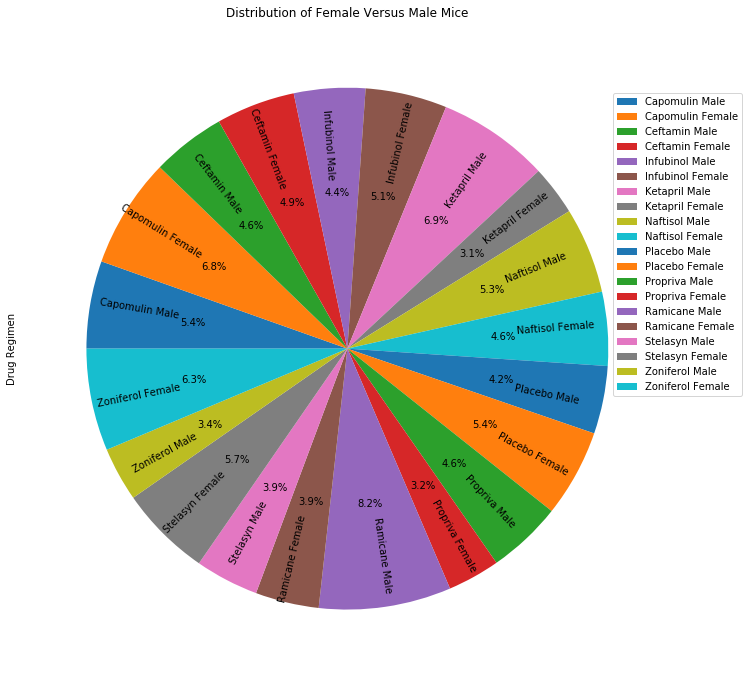

In [45]:
# This looks terrible and would be a horrible way of showing any 
# information, but I did learn a lot in the attempt
ax = pie_chart_data.plot(kind='pie', y="Drug Regimen", figsize=(12,12)
                             , title="Distribution of Female Versus Male Mice"
                             ,radius=1
                             ,labeldistance=.65
                             ,rotatelabels =True, startangle=180
                             ,counterclock=False
                             , autopct='%1.1f%%')
patches, labels = ax.get_legend_handles_labels()


ax.legend(patches, labels, bbox_to_anchor=(.9, .9))
#ax.legend(patches, labels, loc="lower right", ncol=3, mode="expand")

## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Need to get the final tumor volume for the mouse
# try to get the last timepoint for each mouse
groupby_mouse = clean_mouse_study_df.groupby(clean_mouse_study_df.index)
max_mouse_timepoint = pd.DataFrame(groupby_mouse["Timepoint"].max())

# For the mouse and timepoint get all of the associated records 
# can't easily merge on multiple values using index, switch dataframe indexes
max_mouse_timepoint.reset_index(inplace=True)
clean_mouse_study2 = clean_mouse_study_df.reset_index()

# use the merge function to only get the last timepoint for any given mouse
final_tumor_volume_df = pd.merge(max_mouse_timepoint, clean_mouse_study_df,  how='inner', left_on=['Mouse ID', 'Timepoint'], right_on = ['Mouse ID', 'Timepoint'])[["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]]
print(final_tumor_volume_df.head(10))

# get the statistics from a describe
final_tumor_stats = final_tumor_volume_df.groupby("Drug Regimen").describe()
print(final_tumor_stats.head(10))

# use a tuple to retreive the mean and sort taking the first 4
# assuming those are the most promising
tumor_size_mean_df = pd.DataFrame(final_tumor_stats[('Tumor Volume (mm3)',  'mean')])
four_most_promising_regimens = tumor_size_mean_df.sort_values(('Tumor Volume (mm3)',  'mean'), ascending=True).head(4).reset_index()

# attempting to get rid of performance warning, so sorting by name
four_most_promising_regimens.sort_values('Drug Regimen', ascending=True, inplace=True)
four_most_promising_regimens

  Mouse ID  Timepoint Drug Regimen  Tumor Volume (mm3)
0     a203         45    Infubinol           67.973419
1     a251         45    Infubinol           65.525743
2     a262         45      Placebo           70.717621
3     a275         45     Ceftamin           62.999356
4     a366         30     Stelasyn           63.440686
5     a401         45    Zoniferol           66.794156
6     a411         45     Ramicane           38.407618
7     a444         45     Ramicane           43.047543
8     a457         10     Ketapril           49.783419
9     a492         45     Stelasyn           60.122011
             Timepoint                                                       \
                 count       mean        std   min    25%   50%   75%   max   
Drug Regimen                                                                  
Capomulin         25.0  41.000000  10.103630  10.0  45.00  45.0  45.0  45.0   
Ceftamin          25.0  30.600000  18.161314   0.0  15.00  45.0  45.0  45.0   


,Drug Regimen,Tumor Volume (mm3)
,,mean
1,Capomulin,36.667568
3,Ceftamin,57.753977
2,Propriva,56.493884
0,Ramicane,36.191390


In [55]:
# Pull out only the records for the top four
# this is an easier merge, but it may generate a performance warning
print(final_tumor_volume_df.count()[0])

# this has been generating a performance warning.  I added statements to ignore user and performance warnings
# in general, I don't think that would be a good practice, but this is limited data and now worth
# making the same level
top_4_final_tumor_volue_df = pd.merge(final_tumor_volume_df, four_most_promising_regimens,  how='inner', on='Drug Regimen')[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
top_4_final_tumor_volue_df.set_index('Mouse ID', inplace=True)
top_4_final_tumor_volue_df

248


,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
a275,Ceftamin,62.999356
b447,Ceftamin,45.000000
b487,Ceftamin,56.057749
b759,Ceftamin,55.742829
f436,Ceftamin,48.722078
...,...,...
v923,Capomulin,40.658124
w150,Capomulin,39.952347
w914,Capomulin,36.041047


In [199]:
top_4_regimen

1    Capomulin
3     Ceftamin
2     Propriva
0     Ramicane
Name: Drug Regimen, dtype: object

In [200]:
#CRAP!!!!!!!!!! Just read the read.me and the 4 are given and not something we were to determine.  It took time to work
# through that!!!!!!!!
#top_4_regimen = four_most_promising_regimens["Drug Regimen"]
#top_4_final_tumor_volue_df.reset_index(inplace=True)
top_4_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
data_list = []
for regimen in top_4_regimen:

    test_mice_for_regimen = clean_mouse_study_df.loc[(clean_mouse_study_df["Drug Regimen"] == regimen)]
    #print(test_mice_for_regimen.head(100))
    # generate quartiles to determine inner quartile
    tumor_data = test_mice_for_regimen["Tumor Volume (mm3)"] 
    #print(tumor_data.head(15))
    
    # capture for next step
    data_list.append({"Drug Regimen" : regimen
                     , "Tumor Data" : tumor_data})
    quartiles = tumor_data.quantile([.25, .5, .75])
    #print(quartiles)

    # determine lower and upper quartiles, with the difference between being the iqr (inner quartile range)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # display quartile ranges
    print(f"The lower quartile of Tumor Volume Size for {regimen}: {lowerq}")
    print(f"The upper quartile of Tumor Volume Size for {regimen}: {upperq}")
    print(f"The interquartile range of Tumor Volume Size for {regimen}: {iqr}")

    # calculate lower and upper bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # display lower and upper bounds
    print("".join('-' for n in range(80)))
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # are there outliers?
    outliers = test_mice_for_regimen.loc[(tumor_data < lower_bound) | 
                              (tumor_data > upper_bound)]
    if outliers.empty:
        print(f"There are no outliers for {regimen}")
    else:
        print(f"There are {len(outliers)} outliers for {regimen}")
    print("".join('=' for n in range(80)))
    print()


The lower quartile of Tumor Volume Size for Capomulin: 37.685932865
The upper quartile of Tumor Volume Size for Capomulin: 45.0
The interquartile range of Tumor Volume Size for Capomulin: 7.314067135000002
--------------------------------------------------------------------------------
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
There are 2 outliers for Capomulin

The lower quartile of Tumor Volume Size for Ramicane: 36.67463458499999
The upper quartile of Tumor Volume Size for Ramicane: 45.0
The interquartile range of Tumor Volume Size for Ramicane: 8.325365415000007
--------------------------------------------------------------------------------
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.
There are 1 outliers for Ramicane

The lower quartile of Tumor Volume Size for Infubinol: 47.3123533
The upper quartile of Tumor Volume Size for Infubinol: 57.314443967500004
The interquartil

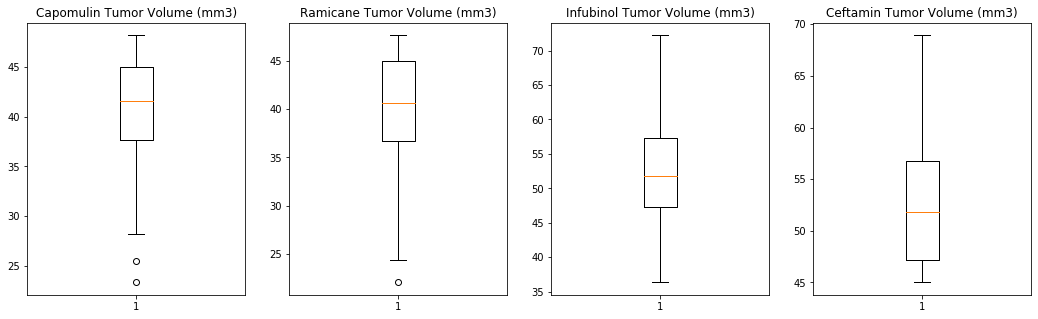

In [201]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axes = plt.subplots(1,4, figsize=(18,5))

for ax in range(4):
    axes[ax].boxplot(data_list[ax]["Tumor Data"])
    title = f"{data_list[ax]['Drug Regimen']} Tumor Volume (mm3)"
    axes[ax].set_title(title)

## Line and Scatter Plots

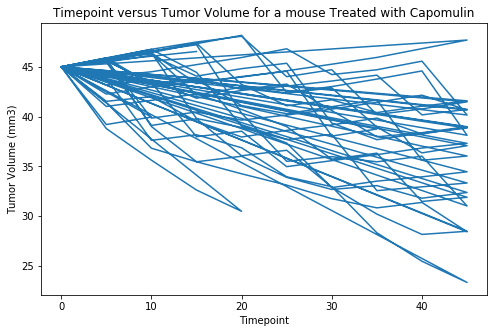

In [166]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = clean_mouse_study_df.loc[(clean_mouse_study_df["Drug Regimen"] == "Capomulin")]
capomulin_timepoint = capomulin_data["Timepoint"]
capomulin_tumorVolume = capomulin_data["Tumor Volume (mm3)"]
ax, fig = plt.subplots(figsize=(8, 5))
plt.plot(capomulin_timepoint, capomulin_tumorVolume)

# Set the title and the labels
plt.title("Timepoint versus Tumor Volume for a mouse Treated with Capomulin")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

y = 0.96x + 21.49


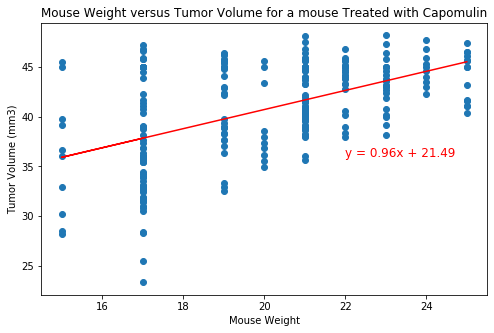

In [198]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mouse_weight = capomulin_data["Weight (g)"]
capomulin_tumorVolume = capomulin_data["Tumor Volume (mm3)"]
ax, fig = plt.subplots(figsize=(8, 5))
plt.scatter(capomulin_mouse_weight, capomulin_tumorVolume)

# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_mouse_weight, capomulin_tumorVolume)
regress_values = capomulin_mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(capomulin_mouse_weight,regress_values,"r-")
print(line_eq)
plt.annotate(line_eq,(22,36),fontsize=12,color="red")

# Set the title and the labels
plt.title("Mouse Weight versus Tumor Volume for a mouse Treated with Capomulin")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')



plt.show()


## Correlation and Regression

In [180]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
average_data = capomulin_data.groupby("Weight (g)").mean()
weight = average_data.iloc[:, 0]
tumor_size = average_data.iloc[: , 3]

correlation = st.pearsonr(weight,tumor_size)
print(f"The correlation between weight and tumor size is {round(correlation[0],2)}")

The correlation between weight and  tumor size is 0.27
